Undegraded shape: (3736, 4)
Aged shape: (3736, 3)


Text(0.5, 1.0, 'PCA Visualization')

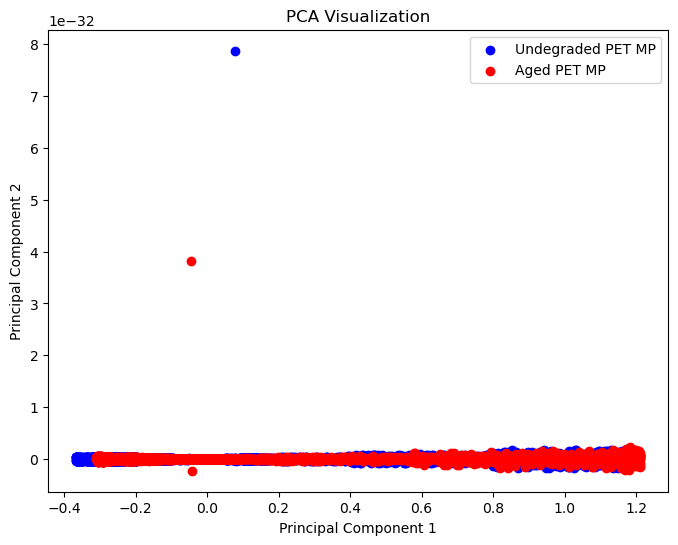

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
# Load your FTIR spectra data
data = pd.read_excel("PETG.xlsx")

# Extract the wavenumbers from the first column
wavenumbers = data.iloc[:, 0]

# Remove the wavenumber column and transpose the DataFrame
data = data.drop(columns=data.columns[0])

# Manually select the columns for "Undegraded" and "Aged" spectra
undegraded = data[["UNDEGRADED", "UNDEGRADED", "UNDEGRADED", "UNDEGRADED"]]
aged = data[["AGED", "AGED", "AGED"]]

# Print the shapes to check if data is as expected
print("Undegraded shape:", undegraded.shape)
print("Aged shape:", aged.shape)

# Create a PCA object and specify the number of components (e.g., 2 or 3 for visualization)
num_components = 2
pca = PCA(n_components=num_components)

# Fit PCA on "Undegraded" spectra and transform it to the lower-dimensional representation
undegraded_pca_result = pca.fit_transform(undegraded.values)  # Convert DataFrame to NumPy array

# Fit PCA on "Aged" spectra and transform it to the lower-dimensional representation
aged_pca_result = pca.fit_transform(aged.values)  # Convert DataFrame to NumPy array

# Now you have the lower-dimensional representations of "Undegraded" and "Aged" spectra
# undegraded_pca_result and aged_pca_result are 2-dimensional arrays with the number of components specified by num_components
# You can use these arrays for further analysis or visualization.

# Plot the results for visualization
plt.figure(figsize=(8, 6))
plt.scatter(undegraded_pca_result[:, 0], undegraded_pca_result[:, 1], label="Undegraded PET MP", color="blue")
plt.scatter(aged_pca_result[:, 0], aged_pca_result[:, 1], label="Aged PET MP", color="red")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Visualization')

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load your FTIR spectra data
data = pd.read_excel("PETG.xlsx")

# Extract the wavenumbers from the first column
wavenumbers = data.iloc[:, 0]

# Remove the wavenumber row and transpose the DataFrame
data = data.drop(index=0).T

# Manually select the columns for "Undegraded" and "Aged" spectra
undegraded_columns = [col for col in data.columns.astype(str) if "UNDEGRADED" in col.upper()]
aged_columns = [col for col in data.columns.astype(str) if "AGED" in col.upper()]

# Check if both datasets have at least one feature (column)
if len(undegraded_columns) == 0 or len(aged_columns) == 0:
    raise ValueError("No common columns found for 'Undegraded' or 'Aged' spectra. Please check your data.")

# Select the spectra for "Undegraded" and "Aged" conditions
undegraded_spectra = data[undegraded_columns]
aged_spectra = data[aged_columns]

# Create labels for the spectra
undegraded_labels = np.zeros(undegraded_spectra.shape[0])  # 0 for undegraded
aged_labels = np.ones(aged_spectra.shape[0])  # 1 for aged

# Combine the spectra and labels
X = np.vstack((undegraded_spectra.values, aged_spectra.values))
y = np.hstack((undegraded_labels, aged_labels))

# Data splitting: Divide the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a PCA object and specify the number of components (e.g., 3 for visualization)
num_components = 3
pca = PCA(n_components=num_components)

# Fit PCA on the training data and transform it to the lower-dimensional representation
X_train_pca = pca.fit_transform(X_train)

# Fit the selected machine learning model on the training data
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

# Transform the testing data using the same PCA transformation
X_test_pca = pca.transform(X_test)

# Model Evaluation: Use the testing set to evaluate the model's performance
y_pred = model.predict(X_test_pca)

# You can now evaluate the model's performance using various metrics like accuracy, precision, recall, etc.
# For example:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


ValueError: No common columns found for 'Undegraded' or 'Aged' spectra. Please check your data.

In [144]:
import pandas as pd

# Load your FTIR spectra data
data = pd.read_excel("PETG.xlsx")

# Remove the wavenumber column
data = data.drop(columns=data.columns[0])

# Manually select the columns for "Undegraded" and "Aged" spectra
undegraded_columns = [col for col in data.columns if col.startswith("UNDEGRADED")]
aged_columns = [col for col in data.columns if col.startswith("AGED")]

# Check if both datasets have at least one feature (column)
if len(undegraded_columns) == 0 or len(aged_columns) == 0:
    raise ValueError("No common columns found for 'Undegraded' or 'Aged' spectra. Please check your data.")

# Select the spectra for "Undegraded" and "Aged" conditions
undegraded_spectra = data[undegraded_columns]
aged_spectra = data[aged_columns]

# Check the shapes of the selected data
print("Undegraded shape:", undegraded_spectra.shape)
print("Aged shape:", aged_spectra.shape)


Undegraded shape: (3736, 5)
Aged shape: (3736, 3)


In [151]:
from sklearn.model_selection import train_test_split

# Determine the minimum number of samples between "Undegraded" and "Aged" spectra
min_samples = min(undegraded_spectra.shape[0], aged_spectra.shape[0])

# Randomly select a subset of "Aged" spectra to match the number of samples in "Undegraded" spectra
aged_spectra_subset = aged_spectra.sample(n=min_samples, random_state=42)

# Combine the spectra and labels
X = pd.concat([undegraded_spectra, aged_spectra_subset], axis=0)
y = np.hstack((np.zeros(min_samples), np.ones(min_samples)))

# Data splitting: Divide the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5977, 8)
y_train shape: (5977,)
X_test shape: (1495, 8)
y_test shape: (1495,)


In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Create the imputer to fill missing values with the mean
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the training data and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create the Random Forest classifier
model = RandomForestClassifier()

# Model Training: Train the model on the imputed training data
model.fit(X_train_imputed, y_train)

# Model Evaluation: Use the imputed testing set to evaluate the model's performance
y_pred = model.predict(X_test_imputed)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[755   0]
 [  0 740]]


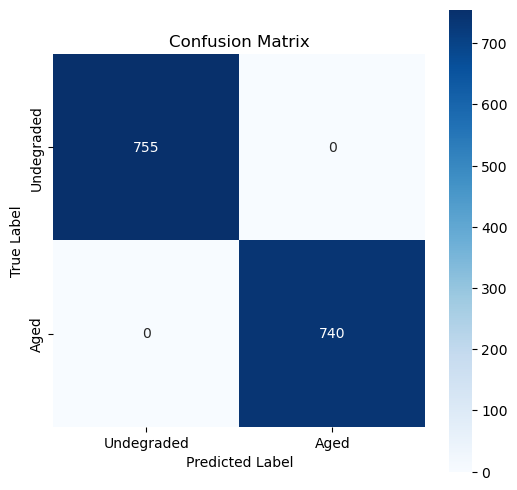

In [149]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Undegraded", "Aged"],
            yticklabels=["Undegraded", "Aged"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


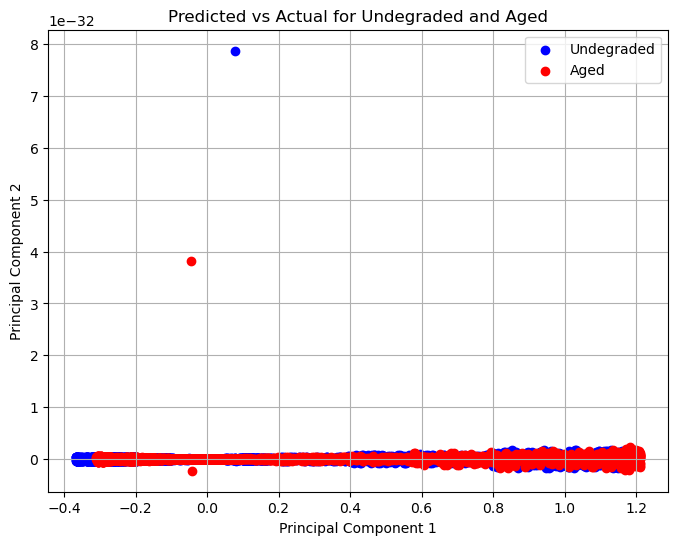

In [150]:
import matplotlib.pyplot as plt

# Select two principal components for visualization
component1 = 0  # Replace with the index of the first principal component
component2 = 1  # Replace with the index of the second principal component

# Plot for Undegraded spectra
plt.figure(figsize=(8, 6))
plt.scatter(undegraded_pca_result[:, component1], undegraded_pca_result[:, component2], c='blue', label='Undegraded')
plt.scatter(aged_pca_result[:, component1], aged_pca_result[:, component2], c='red', label='Aged')
plt.xlabel(f"Principal Component {component1 + 1}")
plt.ylabel(f"Principal Component {component2 + 1}")
plt.title("Predicted vs Actual for Undegraded and Aged")
plt.legend()
plt.grid(True)
plt.show()
